In [69]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() 
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [70]:
X_train = X_train / 255.0
X_test = X_train / 255.0

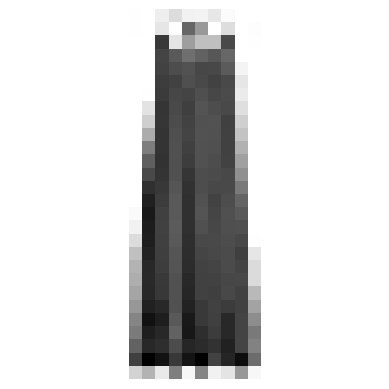

In [71]:
import matplotlib.pyplot as plt 
plt.imshow(X_train[2137], cmap="binary") 
plt.axis('off')
plt.show()

In [72]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka",
               "sandał", "koszula", "but", "torba", "kozak"]
class_names[y_train[2137]]

'sukienka'

In [73]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 300)               235500    
                                                                 
 dense_17 (Dense)            (None, 100)               30100     
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


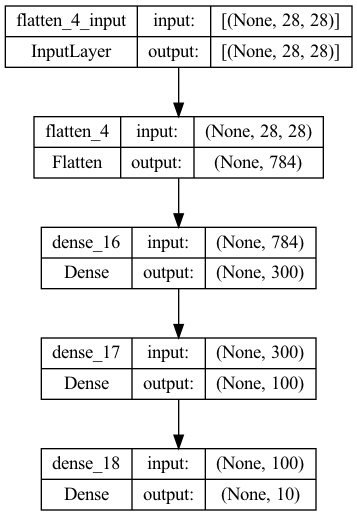

In [74]:
tf.keras.utils.plot_model(model, "fashion_mnist.png", show_shapes=True)

In [75]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

In [76]:
import os

def get_run_logdir(catalog_name):
    import time
    root_logdir = os.path.join(os.curdir, catalog_name)
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir("image_logs")

tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [77]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1, callbacks=[tensorboard_cb])

Epoch 1/20
1688/1688 [==============================] - 2s 971us/step - loss: 0.7117 - accuracy: 0.7684 - val_loss: 0.5011 - val_accuracy: 0.8277
Epoch 2/20
1688/1688 [==============================] - 2s 907us/step - loss: 0.4844 - accuracy: 0.8306 - val_loss: 0.4635 - val_accuracy: 0.8388
Epoch 3/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4398 - accuracy: 0.8457 - val_loss: 0.4232 - val_accuracy: 0.8493
Epoch 4/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4126 - accuracy: 0.8542 - val_loss: 0.4020 - val_accuracy: 0.8563
Epoch 5/20
1688/1688 [==============================] - 2s 970us/step - loss: 0.3936 - accuracy: 0.8619 - val_loss: 0.3945 - val_accuracy: 0.8618
Epoch 6/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3767 - accuracy: 0.8681 - val_loss: 0.3898 - val_accuracy: 0.8587
Epoch 7/20
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3637 - accuracy: 0.8713 - val_loss: 0.3903 - val_acc

(10000,)


1/1 [==============================] - 0s 47ms/step
Prediction: sandał
Confidence: 0.3842809
Truth: sandał


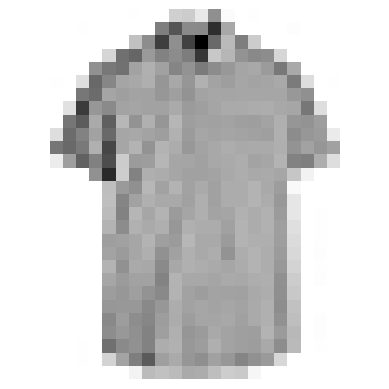

In [78]:
print(y_test.shape)
import numpy as np
image_index = np.random.randint(len(y_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()



In [79]:
model.save("fashion_clf.keras")

In [80]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [81]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])


model = tf.keras.models.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])


model.compile(loss="mse",
                optimizer="adam",
                metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)



In [82]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)

run_logdir_housing = get_run_logdir("housing_logs")
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir_housing)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb, tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 1s 700us/step - loss: 0.7695 - root_mean_squared_error: 0.8772 - val_loss: 0.4095 - val_root_mean_squared_error: 0.6399
Epoch 2/20
363/363 [==============================] - 0s 589us/step - loss: 0.3682 - root_mean_squared_error: 0.6068 - val_loss: 0.5075 - val_root_mean_squared_error: 0.7124
Epoch 3/20
363/363 [==============================] - 0s 543us/step - loss: 0.3460 - root_mean_squared_error: 0.5882 - val_loss: 0.3991 - val_root_mean_squared_error: 0.6317
Epoch 4/20
363/363 [==============================] - 0s 541us/step - loss: 0.3279 - root_mean_squared_error: 0.5726 - val_loss: 0.3470 - val_root_mean_squared_error: 0.5891
Epoch 5/20
363/363 [==============================] - 0s 592us/step - loss: 0.3179 - root_mean_squared_error: 0.5638 - val_loss: 0.4059 - val_root_mean_squared_error: 0.6371
Epoch 6/20
363/363 [==============================] - 0s 542us/step - loss: 0.3066 - root_mean_squared_error: 0.5537 - val_loss: 0

In [83]:
model.save("reg_housing_1.keras")

In [84]:
model = tf.keras.models.Sequential([
    norm_layer,
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse",
                optimizer="adam",
                metrics=["RootMeanSquaredError"])

run_logdir_housing = get_run_logdir("housing_logs")
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir_housing)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb, tensorboard_cb])

model.save("reg_housing_2.keras")



Epoch 1/20
363/363 [==============================] - 1s 746us/step - loss: 0.7987 - root_mean_squared_error: 0.8937 - val_loss: 0.4431 - val_root_mean_squared_error: 0.6657
Epoch 2/20
363/363 [==============================] - 0s 556us/step - loss: 0.3776 - root_mean_squared_error: 0.6145 - val_loss: 0.4098 - val_root_mean_squared_error: 0.6402
Epoch 3/20
363/363 [==============================] - 0s 568us/step - loss: 0.3523 - root_mean_squared_error: 0.5935 - val_loss: 0.4341 - val_root_mean_squared_error: 0.6588
Epoch 4/20
363/363 [==============================] - 0s 543us/step - loss: 0.3361 - root_mean_squared_error: 0.5797 - val_loss: 0.5086 - val_root_mean_squared_error: 0.7132
Epoch 5/20
363/363 [==============================] - 0s 570us/step - loss: 0.3435 - root_mean_squared_error: 0.5861 - val_loss: 0.3518 - val_root_mean_squared_error: 0.5931
Epoch 6/20
363/363 [==============================] - 0s 539us/step - loss: 0.3130 - root_mean_squared_error: 0.5594 - val_loss: 0

In [85]:
model = tf.keras.models.Sequential([
    norm_layer,
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse",
                optimizer="adam",
                metrics=["RootMeanSquaredError"])

run_logdir_housing = get_run_logdir("housing_logs")
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir_housing)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb, tensorboard_cb])

model.save("reg_housing_3.keras")

Epoch 1/20
363/363 [==============================] - 1s 886us/step - loss: 0.6587 - root_mean_squared_error: 0.8116 - val_loss: 0.4556 - val_root_mean_squared_error: 0.6750
Epoch 2/20
363/363 [==============================] - 0s 726us/step - loss: 0.3664 - root_mean_squared_error: 0.6053 - val_loss: 0.5033 - val_root_mean_squared_error: 0.7095
Epoch 3/20
363/363 [==============================] - 0s 786us/step - loss: 0.3549 - root_mean_squared_error: 0.5957 - val_loss: 0.4668 - val_root_mean_squared_error: 0.6832
Epoch 4/20
363/363 [==============================] - 0s 883us/step - loss: 0.3221 - root_mean_squared_error: 0.5676 - val_loss: 0.4291 - val_root_mean_squared_error: 0.6550
Epoch 5/20
363/363 [==============================] - 0s 765us/step - loss: 0.3237 - root_mean_squared_error: 0.5690 - val_loss: 0.5018 - val_root_mean_squared_error: 0.7084
Epoch 6/20
363/363 [==============================] - 0s 734us/step - loss: 0.3127 - root_mean_squared_error: 0.5592 - val_loss: 0